In [1]:
# from URL https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [2]:
import os

import numpy as np

# Pandas is used for data manipulation
import pandas as pd

import time

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Import sklearn metri
from sklearn.metrics import mean_squared_error

# Import math function square roo
from math import sqrt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [3]:
# Read in data and display first 5 rows
train_features_pd = pd.read_csv('LD50_training_set-2d.csv')
train_features_pd.head(5)

,CAS,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
0,50-07-7,4.047,17.386387,11.340277,11.079254,10.057941,8.636040,7.382219,5.946603,4.496991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50-12-4,2.410,11.759149,7.615026,6.750850,6.371573,4.958549,3.615072,1.897738,1.040300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50-14-6,4.598,21.181434,13.719070,12.957336,10.777409,8.205763,6.285197,4.247346,3.026434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50-18-0,3.417,10.441311,6.726492,5.488964,4.255654,3.305887,2.487616,1.120100,0.492799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50-29-3,3.610,14.043606,8.876029,8.931713,6.136763,5.089073,4.087474,2.317743,1.951649,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('The shape of our training features is:', train_features_pd.shape)

# Descriptive statistics for each column
train_features_pd.describe()

The shape of our training features is: (5931, 799)


,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,xp8,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
count,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,...,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.0,5931.0
mean,2.552860,11.999317,7.657210,6.830285,5.185652,3.934990,2.897020,1.860699,1.194395,0.767096,...,0.062384,0.008093,0.032541,0.001686,0.010959,0.003709,0.000674,0.000674,0.0,0.0
std,0.948281,5.460776,3.681350,3.559938,3.183362,2.798048,2.382041,1.788694,1.368321,1.023896,...,0.250772,0.117314,0.187609,0.048560,0.114900,0.114629,0.025963,0.025963,0.0,0.0
min,0.470000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.866000,8.267585,5.109061,4.354232,2.998498,1.968614,1.250444,0.603099,0.246400,0.058926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.378000,11.311555,7.181981,6.384996,4.764428,3.504583,2.465228,1.458563,0.846257,0.472895,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3.037500,14.620956,9.501454,8.571013,6.711874,5.225209,3.970137,2.591672,1.648428,1.036503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,7.100000,65.976998,39.209089,36.933344,33.279127,29.860123,25.499405,20.991384,17.089898,13.703075,...,2.000000,4.000000,3.000000,2.000000,2.000000,6.000000,1.000000,1.000000,0.0,0.0


In [5]:
# Read in data and display first 5 rows
test_features_pd = pd.read_csv('LD50_prediction_set-2d.csv')
test_features_pd.head(5)

,CAS,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
0,50-06-6,3.156,12.466255,8.108226,7.179531,6.324463,5.658249,3.539143,2.311211,1.175338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50-19-1,2.537,11.311555,7.082334,6.275039,4.691250,3.087496,2.477350,1.220083,0.646223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50-21-5,1.405,5.154701,2.642734,2.488034,1.333333,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50-31-7,2.540,9.300965,5.536581,5.212402,4.008907,3.142882,1.836064,0.771486,0.359117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50-76-0,5.241,66.976633,42.101630,40.571150,34.394592,28.615033,20.561566,14.672199,10.880444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test_features_pd_NaN = test_features_pd.copy()
test_features_pd_NaN.iloc[2,2] = 'NaN'
test_features_pd_NaN.iloc[1,3] = 'NaN'
test_features_pd_NaN.head(5)

,CAS,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
0,50-06-6,3.156,12.4663,8.10823,7.179531,6.324463,5.658249,3.539143,2.311211,1.175338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50-19-1,2.537,11.3116,NaN,6.275039,4.691250,3.087496,2.477350,1.220083,0.646223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50-21-5,1.405,NaN,2.64273,2.488034,1.333333,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50-31-7,2.540,9.30096,5.53658,5.212402,4.008907,3.142882,1.836064,0.771486,0.359117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50-76-0,5.241,66.9766,42.1016,40.571150,34.394592,28.615033,20.561566,14.672199,10.880444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
imp = IterativeImputer(max_iter=2, random_state=0)
test_features_pd_float = test_features_pd_NaN.loc[:,'Tox':'SssssSi']
test_features_pd_float.head(5)

,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,xp8,...,SaaO,SsOm,SsF,SsCl,SsBr,SsI,SsSiH3,SssSiH2,SsssSiH,SssssSi
0,3.156,12.4663,8.10823,7.179531,6.324463,5.658249,3.539143,2.311211,1.175338,0.707825,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0.0
1,2.537,11.3116,NaN,6.275039,4.691250,3.087496,2.477350,1.220083,0.646223,0.282718,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0.0
2,1.405,NaN,2.64273,2.488034,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0.0
3,2.540,9.30096,5.53658,5.212402,4.008907,3.142882,1.836064,0.771486,0.359117,0.128300,...,0.0,0.0,0.0,16.744784,0.0,0.0,0,0,0,0.0
4,5.241,66.9766,42.1016,40.571150,34.394592,28.615033,20.561566,14.672199,10.880444,7.875101,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0.0


In [65]:
X = imp.fit_transform(test_features_pd_float)
Xdf = pd.DataFrame(X, columns = test_features_pd_float.columns)
Xdf.head(5)

,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,xp8,...,SaaO,SsOm,SsF,SsCl,SsBr,SsI,SsSiH3,SssSiH2,SsssSiH,SssssSi
0,3.156,12.466255,8.108226,7.179531,6.324463,5.658249,3.539143,2.311211,1.175338,0.707825,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2.537,11.311555,7.063877,6.275039,4.691250,3.087496,2.477350,1.220083,0.646223,0.282718,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.405,5.137815,2.642734,2.488034,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2.540,9.300965,5.536581,5.212402,4.008907,3.142882,1.836064,0.771486,0.359117,0.128300,...,0.0,0.0,0.0,16.744784,0.0,0.0,0.0,0.0,0.0,0.0
4,5.241,66.976633,42.101630,40.571150,34.394592,28.615033,20.561566,14.672199,10.880444,7.875101,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
print('The shape of our test features is:', test_features_pd_NaN.shape)

# Descriptive statistics for each column
test_features_pd_NaN.describe()

The shape of our test features is: (1482, 799)


,Tox,x2,xp3,xp4,xp5,xp6,xp7,xp8,xp9,xp10,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,...,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.0,1482.0
mean,2.565082,6.865793,5.195437,3.949950,2.915614,1.870259,1.204566,0.784084,0.476119,0.285327,...,0.068151,0.006073,0.033738,0.000675,0.013495,0.002699,0.001350,0.002024,0.0,0.0
std,0.964706,3.628667,3.167520,2.809032,2.390250,1.780820,1.367983,1.034046,0.751019,0.532143,...,0.262586,0.134885,0.191503,0.025976,0.131808,0.073447,0.036724,0.058069,0.0,0.0
min,0.291000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.887250,4.311783,2.957107,1.981949,1.250444,0.595522,0.246400,0.072169,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.383000,6.440467,4.788810,3.470759,2.473209,1.460719,0.826782,0.469763,0.232731,0.088737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3.074000,8.766087,6.793228,5.261603,3.998611,2.625389,1.689782,1.084320,0.635326,0.353912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,7.207000,40.571150,34.394592,28.615033,20.561566,14.891044,13.158424,11.073737,9.589856,7.689532,...,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.0,0.0


In [70]:
# Labels are the values we want to predict
train_labels = np.array(train_features_pd['Tox'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features_pd = train_features_pd.drop('CAS', axis = 1)
train_features_pd = train_features_pd.drop('Tox', axis = 1)
# Saving feature names for later use
train_features_list = list(train_features_pd.columns)

# Convert to numpy array
train_features = np.array(train_features_pd)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)

KeyError: 'Tox'

In [25]:
# Labels are the values we want to predict
test_labels = np.array(test_features_pd_NaN['Tox'])
# Remove the labels from the features
# axis 1 refers to the columns
test_features_pd = test_features_pd_NaN.drop('CAS', axis = 1)
test_features_pd = test_features_pd.drop('Tox', axis = 1)
# Saving feature names for later use
test_features_list = list(test_features_pd.columns)

# Convert to numpy array
test_features = np.array(test_features_pd)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Testing Features Shape: (1482, 797)
Testing Labels Shape: (1482,)


In [26]:
t1 = time.time()
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 300, random_state = 42, n_jobs = -1, min_impurity_decrease = 1e-5,
                           oob_score=True)
#rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1, max_depth = 16)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = 36, max_features = 0.5)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = 36, oob_score = True)
# Train the model on training data
rf.fit(train_features, train_labels);
t2 = time.time()
print('Time lapse = ',t2-t1)

Time lapse =  241.92807602882385


In [27]:
print('params = ',rf.get_params(True))

params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 1e-05, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [28]:
#print(rf.oob_score_)
print('Rsq for Training Data = ',rf.score(train_features, train_labels))
# Use the forest's predict method on the train data
#train_predictions = rf.predict(train_features)
#meanSquaredError=mean_squared_error(train_labels, train_predictions)
#rootMeanSquaredError = sqrt(meanSquaredError)
#print("RMSE:", rootMeanSquaredError)

Rsq for Training Data =  0.9412184975864784


In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features,)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'toxicity.')#
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [73]:
print('Rsq for Test Data = ',rf.score(test_features, test_labels))
# Use the forest's predict method on the train data
meanSquaredError=mean_squared_error(test_labels, predictions)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

Rsq for Test Data =  0.2007128152471862
RMSE: 0.8621836834477997


In [74]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

fcnt = 0
for i in range(len(importances)):
    thisimp = importances[indices[i]]
    if (thisimp > 5.0e-3):
        fcnt+=1

In [75]:
# Print the feature ranking
print("Feature ranking:\n")

train_features_list2 = train_features_list[0:fcnt]
importances2 = importances[0:fcnt]
std2 = std[0:fcnt]
invsqrt = 1.0/sqrt(len(rf.estimators_))
for i in range(len(train_features_list2)):
    train_features_list2[i] = train_features_list[indices[i]]
    importances2[i] = importances[indices[i]]
    std2[i] = std[indices[i]] * invsqrt  # standard error of the mean importance
    sub = train_features_list2[i]
    lensub = len(sub)
    if lensub < 5:
        print("%d) %s\t\t\t = %f +/- %f" % (i,train_features_list2[i],importances2[i],std2[i]))
    elif lensub < 13:
        print("%d) %s\t\t = %f +/- %f" % (i,train_features_list2[i],importances2[i],std2[i]))
    elif lensub < 26:
        print("%d) %s\t = %f +/- %f" % (i,train_features_list2[i],importances2[i],std2[i]))
    else:
        print("%d) %s = %f +/- %f" % (i,train_features_list2[i],importances2[i],std2[i]))

Feature ranking:

0) ATS2m		 = 0.111779 +/- 0.003660
1) SdsssP		 = 0.086273 +/- 0.002998
2) nN			 = 0.033374 +/- 0.000590
3) -C(=O)O- [nitrogen attach] = 0.024508 +/- 0.000507
4) ANH			 = 0.023074 +/- 0.001222
5) AMW			 = 0.018183 +/- 0.000510
6) BEHm1		 = 0.011074 +/- 0.001666
7) ATS1m		 = 0.010942 +/- 0.002092
8) Mv			 = 0.009853 +/- 0.000482
9) SssssC		 = 0.009740 +/- 0.000952
10) ALOGP		 = 0.008849 +/- 0.000257
11) BEHe1		 = 0.007839 +/- 0.000684
12) MDEC23		 = 0.007778 +/- 0.000552
13) xvch5		 = 0.007183 +/- 0.000524
14) xvch9		 = 0.006419 +/- 0.000735
15) -O- [2 aromatic attach]	 = 0.005724 +/- 0.000378
16) Hy			 = 0.005445 +/- 0.000237
17) SdsssP_acnt		 = 0.005119 +/- 0.001341
18) ivdem		 = 0.005011 +/- 0.000306


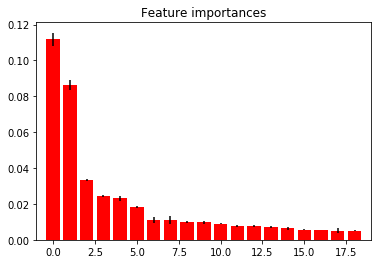

In [76]:
# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(train_features_list2)), importances2, color="r",
             yerr=std2, align="center")
#plt.xticks(range(len(train_features_list2())))
plt.xticks()
plt.xlim([-1,len(train_features_list2)])
plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def subplot (name):
    figure, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
    if name == "Tox":
        sns.distplot(train_labels, ax=ax1, axlabel="Tox(Train)", norm_hist=True, kde=False)
        sns.distplot(test_labels, ax=ax2, axlabel="Tox(Test)", norm_hist=True, kde=False)
        plt.show()
    else:
        train_pc = np.array(train_features_pd[name])
        sns.distplot(train_pc, ax=ax1, axlabel=name+"(Train)", norm_hist=True, kde=False)
        test_pc = np.array(test_features_pd[name])
        sns.distplot(test_pc, ax=ax2, axlabel=name+"(Test)", norm_hist=True, kde=False)
        plt.show()
    return;

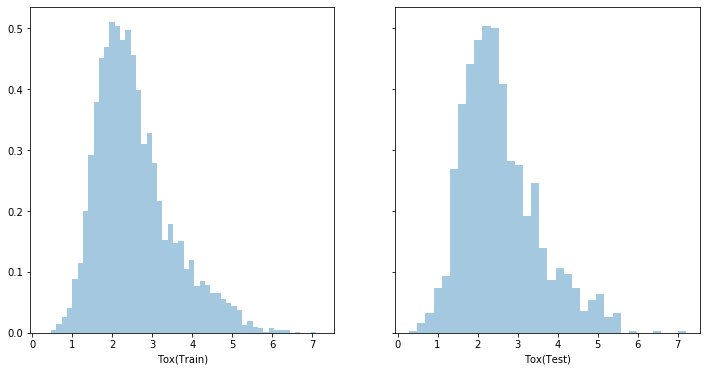

In [24]:
subplot("Tox")

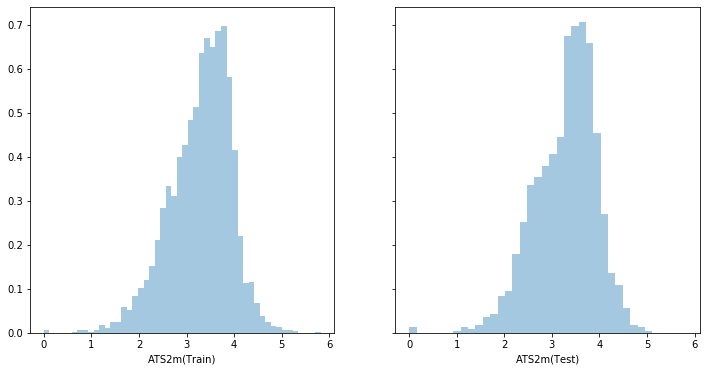

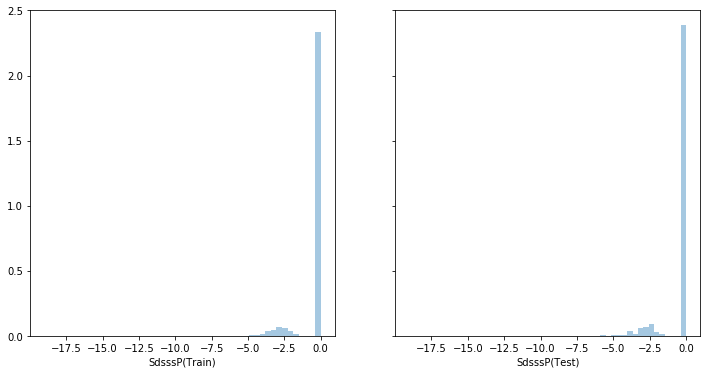

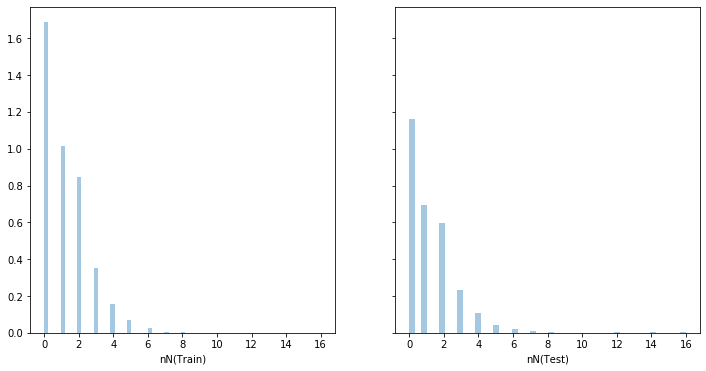

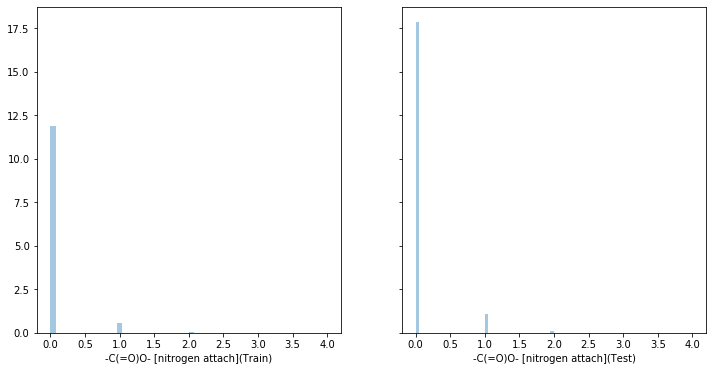

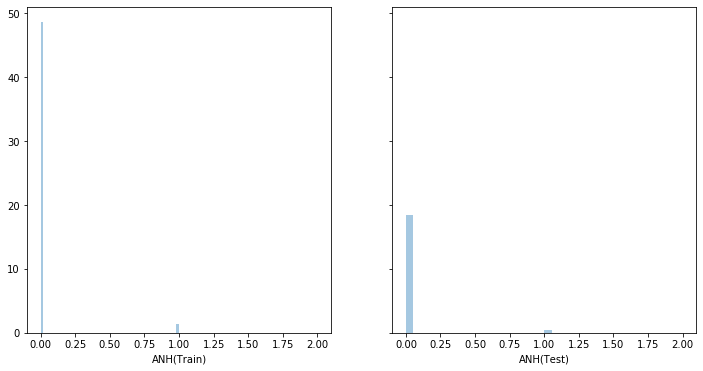

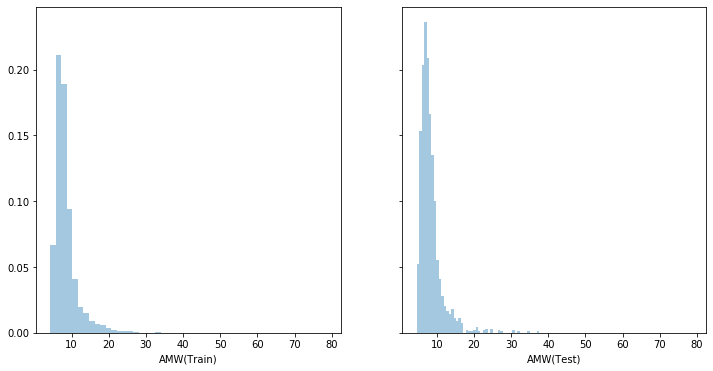

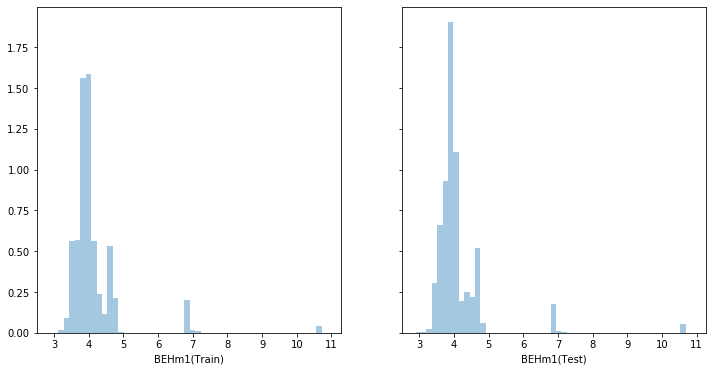

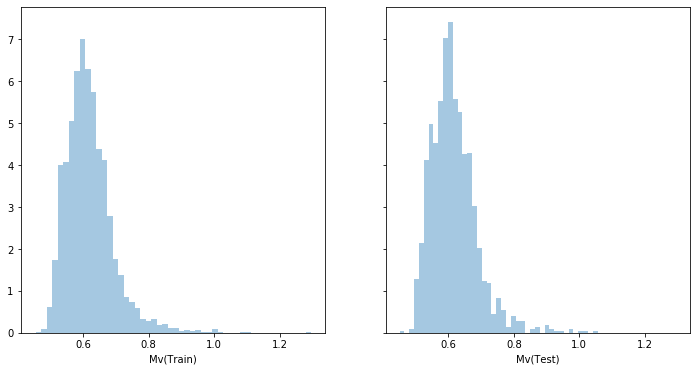

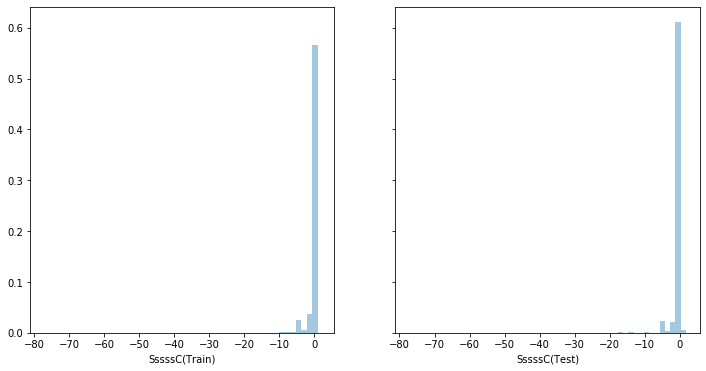

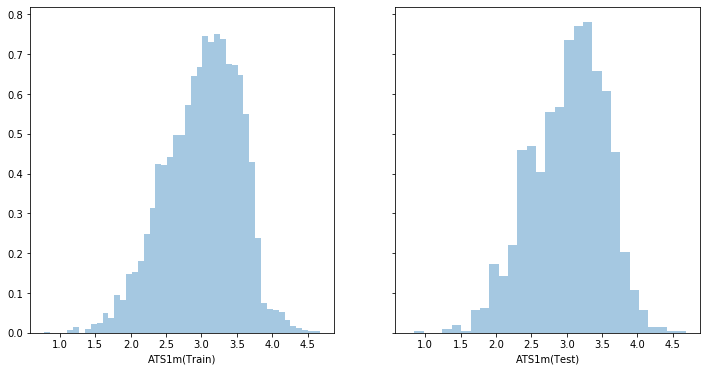

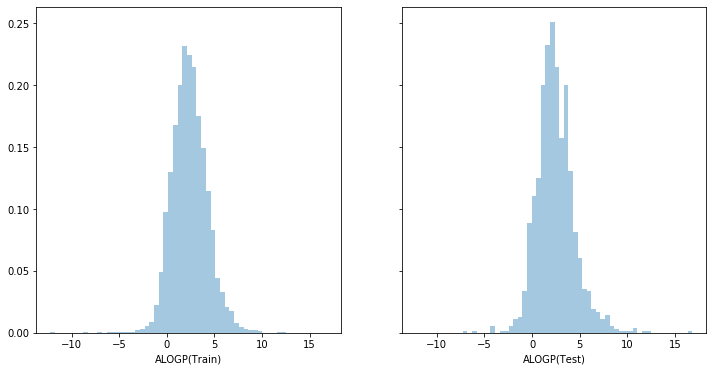

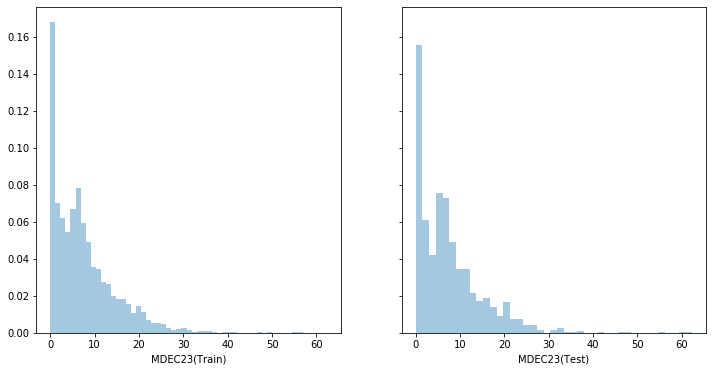

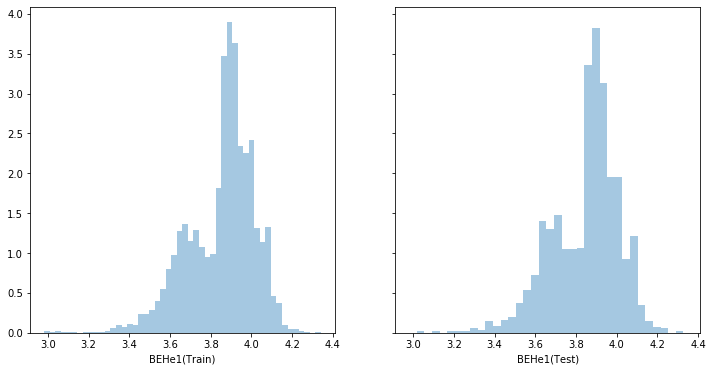

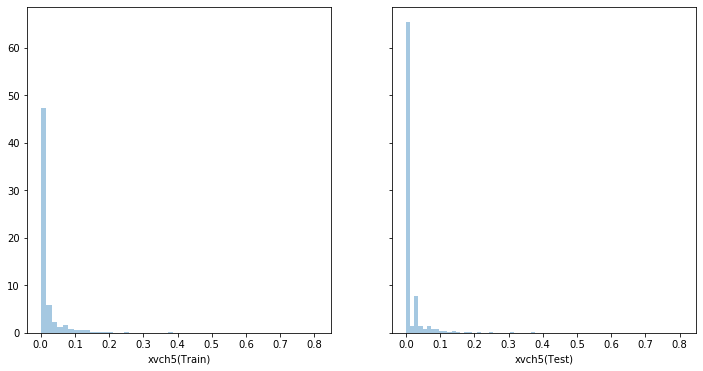

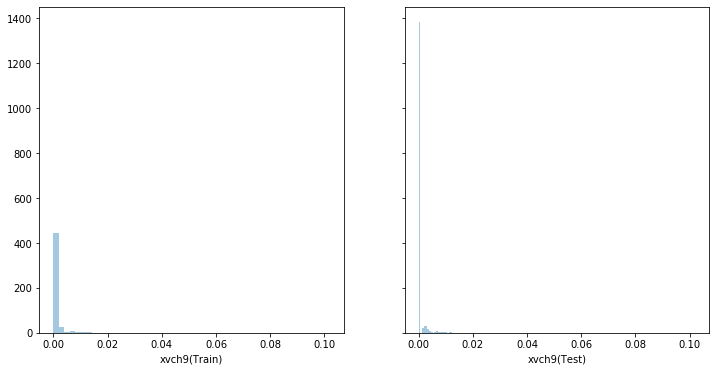

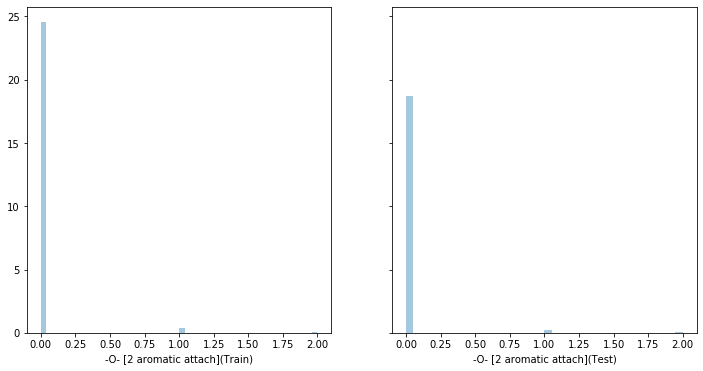

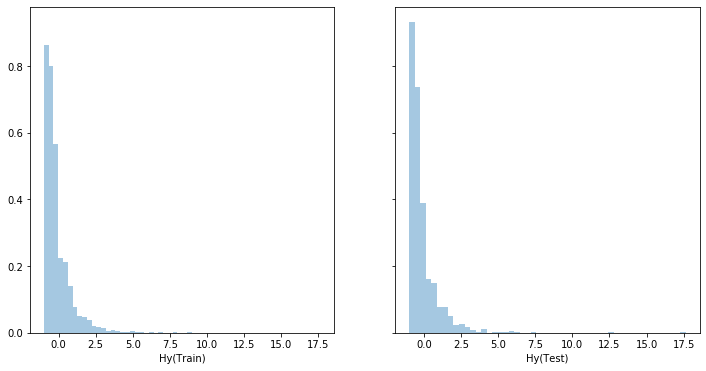

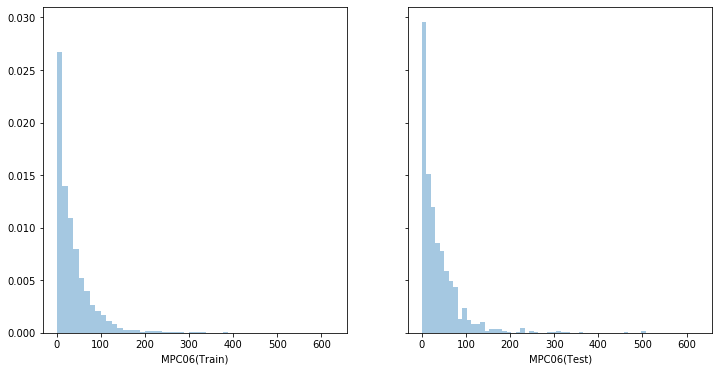

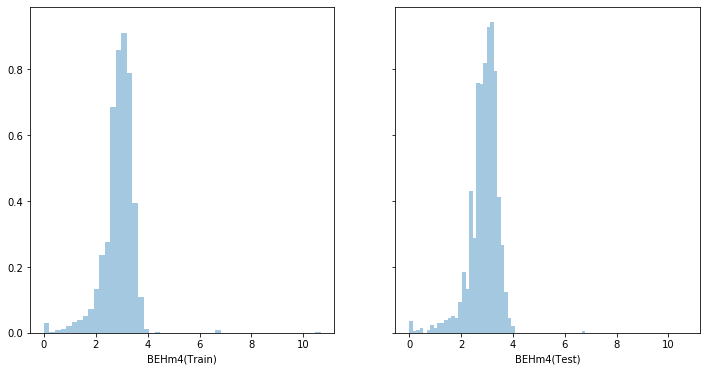

In [25]:
for i in range(len(train_features_list2)):
    subplot(train_features_list2[i])